cdf(posterior, 0.965) - cdf(posterior, 0.435) = 0.9500343813839003


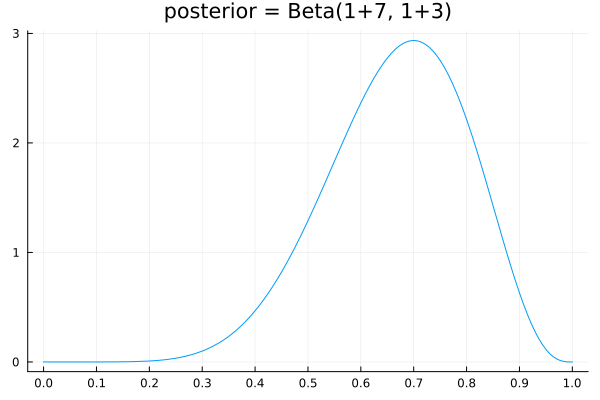

In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

posterior = Beta(1+7, 1+3)
@show cdf(posterior, 0.965) - cdf(posterior, 0.435)

plot(posterior; label="", title="posterior = Beta(1+7, 1+3)")
plot!(xtick=0:0.1:1)

ci = [p_L, p_L + f(p_L)] = [0.4120474441938444, 0.9066276703189324]


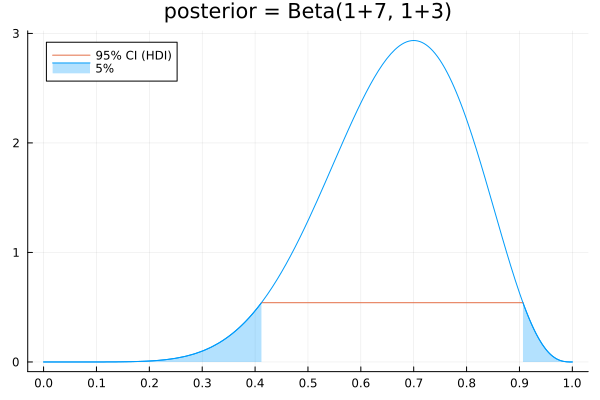

In [2]:
using Optim
using Distributions
using StatsPlots
default(fmt=:png)

posterior = Beta(1+7, 1+3)

α = 0.05
f(p) = quantile(posterior, cdf(posterior, p)+1-α) - p
o = optimize(f, 0, quantile(posterior, α))
p_L = o.minimizer
@show ci = [p_L, p_L+f(p_L)]

plot(posterior; label="", title="posterior = Beta(1+7, 1+3)")
plot!(ci, fill(pdf(posterior, p_L), 2); label="95% CI (HDI)")
plot!(posterior, 0, ci[begin]; fillrange=0, fa=0.3, c=1, label="5%")
plot!(posterior, ci[end], 1; fillrange=0, fa=0.3, c=1, label="")
plot!(xtick=0:0.1:1)

In [3]:
using Distributions
using Optim

function ci_bayes_(k, n; α=0.05)
    posterior = Beta(1+k, 1+n-k)
    f(p) = quantile(posterior, cdf(posterior, p)+1-α) - p
    o = optimize(f, 0, quantile(posterior, α))
    p_L = o.minimizer
    [p_L, p_L+f(p_L)]
end

function ci_wilson(k, n; α=0.05)
    c = cquantile(Normal(), α/2)
    p̂ = k/n
    L = 1/(1+c^2/n) * (p̂ + c^2/(2n) - c*√(p̂*(1-p̂)/n + c^2/(4n^2)))
    U = 1/(1+c^2/n) * (p̂ + c^2/(2n) + c*√(p̂*(1-p̂)/n + c^2/(4n^2)))
    [L, U]
end

r(x) = round(x; sigdigits=3)

@show ci_bayes_(7, 10) .|> r
@show ci_wilson(7, 10) .|> r;

ci_bayes_(7, 10) .|> r = [0.412, 0.907]
ci_wilson(7, 10) .|> r = [0.397, 0.892]


In [4]:
@show ci_bayes_(70, 100) .|> r
@show ci_wilson(70, 100) .|> r;

ci_bayes_(70, 100) .|> r = [0.607, 0.783]
ci_wilson(70, 100) .|> r = [0.604, 0.781]


In [5]:
@show ci_bayes_(700, 1000) .|> r
@show ci_wilson(700, 1000) .|> r;

ci_bayes_(700, 1000) .|> r = [0.671, 0.728]
ci_wilson(700, 1000) .|> r = [0.671, 0.728]


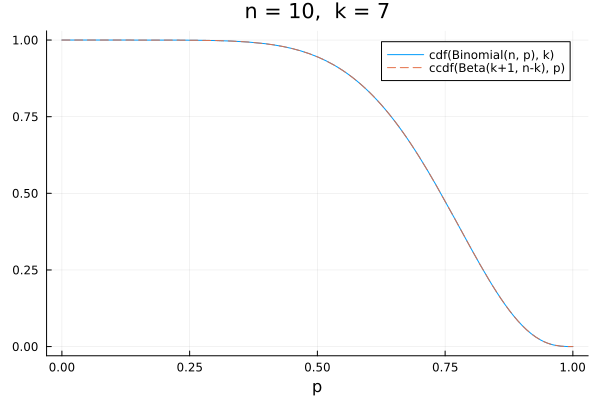

In [6]:
using Distributions
using StatsPlots
default(fmt=:png)

k, n = 7, 10
f(p) = cdf(Binomial(n, p), k)
g(p) = ccdf(Beta(k+1, n-k), p)

plot(f, 0, 1; label="cdf(Binomial(n, p), k)")
plot!(g, 0, 1; ls=:dash, label="ccdf(Beta(k+1, n-k), p)")
title!("n = $n,  k = $k")
plot!(xguide="p")

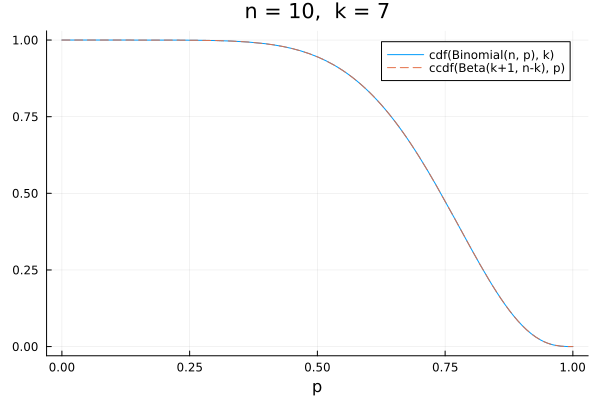

In [7]:
using Distributions
using StatsPlots
default(fmt=:png)
using SpecialFunctions

k, n = 7, 10
F(p) = sum(binomial(n, i) * p^i * (1-p)^(n-i) for i in 0:k)
G(p) = beta_inc(k+1, n-k, p)[2]

plot(F, 0, 1; label="cdf(Binomial(n, p), k)")
plot!(G, 0, 1; ls=:dash, label="ccdf(Beta(k+1, n-k), p)")
title!("n = $n,  k = $k")
plot!(xguide="p")

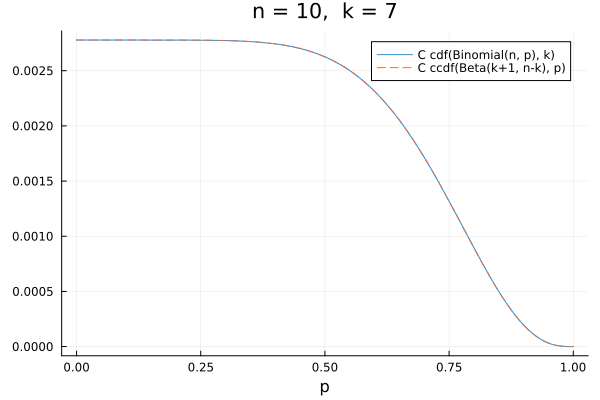

In [8]:
using Distributions
using StatsPlots
default(fmt=:png)
using SpecialFunctions

k, n = 7, 10
c(i) = factorial(k)*factorial(n-k-1)/(factorial(i)*factorial(n-i))
F(p) = sum(c(i) * p^i * (1-p)^(n-i) for i in 0:k)
G(p) = beta(k+1, n-k) * beta_inc(k+1, n-k, p)[2]

plot(F, 0, 1; label="C cdf(Binomial(n, p), k)")
plot!(G, 0, 1; ls=:dash, label="C ccdf(Beta(k+1, n-k), p)")
title!("n = $n,  k = $k")
plot!(xguide="p")

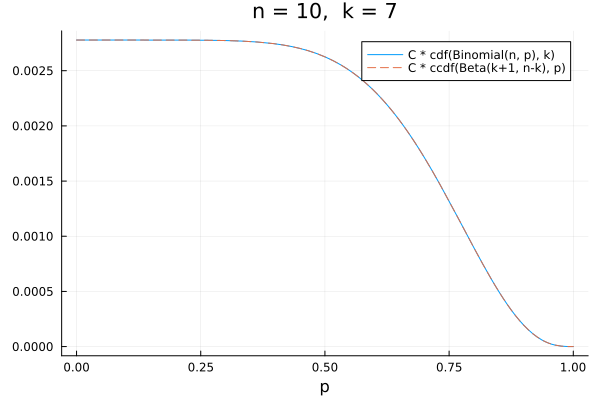

In [9]:
using Distributions
using StatsPlots
default(fmt=:png)
using SpecialFunctions

k, n = 7, 10
c(i) = prod(i+1:k) / prod(n-i:-1:n-k)
F(p) = sum(c(i) * p^i * (1-p)^(n-i) for i in 0:k)
G(p) = beta(k+1, n-k) * beta_inc(k+1, n-k, p)[2]

plot(F, 0, 1; label="C * cdf(Binomial(n, p), k)")
plot!(G, 0, 1; ls=:dash, label="C * ccdf(Beta(k+1, n-k), p)")
title!("n = $n,  k = $k")
plot!(xguide="p")

In [10]:
[(k, n-k-1, i, n-i) for i in 0:k]

8-element Vector{NTuple{4, Int64}}:
 (7, 2, 0, 10)
 (7, 2, 1, 9)
 (7, 2, 2, 8)
 (7, 2, 3, 7)
 (7, 2, 4, 6)
 (7, 2, 5, 5)
 (7, 2, 6, 4)
 (7, 2, 7, 3)

一般に次の公式が成立している:

$$
\sum_{i=0}^k \frac{n!}{i!(n-i)!} p^i (1-p)^{n-i} =
\frac{\int_p^1 t^{k} (1-t)^{n-k-1} \,dt}{\int_0^1 t^{k} (1-t)^{n-k-1} \,dt}.
$$

さらに、

$$
\int_0^1 t^{k} (1-t)^{n-k-1} \,dt = B(k+1, n-k) =
\frac{\Gamma(k+1)\Gamma(n-k)}{\Gamma(n+1)} =
\frac{k!(n-k-1)!}{n!}
$$

なので、

$$
\sum_{i=0}^k \frac{n!}{i!(n-i)!} p^i (1-p)^{n-i} =
\frac{n!}{k!(n-k-1)!} \int_p^1 t^{k} (1-t)^{n-k-1} \,dt.
$$

すなわち

$$
\begin{aligned}
&
\int_p^1 t^{k} (1-t)^{n-k-1} \,dt =
\sum_{i=0}^k \frac{k!(n-k-1)!}{i!(n-i)!} p^i (1-p)^{n-i}
\\ &=
\frac{1}{n-k} p^{k} (1-p)^{n-k} +
\frac{k}{(n-k)(n-k+1)} p^{k-1} (1-p)^{n-k+1} +
\frac{k(k-1)}{(n-k)(n-k+1)(n-k+2)} p^{k-2} (1-p)^{n-k+2} 
\\ & \quad + \cdots +
\frac{k(k-1)\cdots 2}{(n-k)(n-k+1)\cdots (n-1)} p (1-p)^{n-1} +
\frac{k(k-1)\cdots 2\cdot 1}{(n-k)(n-k+1)\cdots (n-1)n} (1-p)^{n}
\end{aligned}
$$

例えば, $n=10$, $k=3$ のとき,

$$
\int_p^1 t^3 (1-t)^6 \,dt =
\frac{1}{7} p^3(1-p)^7 +
\frac{3}{7\cdot 8} p^2(1-p)^8 +
\frac{3\cdot 2}{7\cdot 8\cdot 9} p(1-p)^9 +
\frac{3\cdot 2\cdot 1}{7\cdot 8\cdot 9\cdot 10} (1-p)^{10}
$$